We are working with secondary school students data. The visualizations in this notebook help to determine the biggest influencer of student's grades. Based on this influencer, we wish to study in depth about what could be avoided or what could be used to help students perform better. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We use a data set that has data about math and portuguese classes

In [2]:
d_math = pd.read_csv('student-mat.csv')
d_por = pd.read_csv('student-por.csv')

In [3]:
d_math.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


From the pie chart below, we can see that majority of the students contribute a decent amount of time to study. We can see that 50% of the students spend about 2-5 hours in studying on a regular basis. More than half of the class spends very little time to study on a weekly basis. This alone looks like the most responsible factor that affects the grades. However, there are other factors too that influence their academic performance. We shall see more of the factors in this project

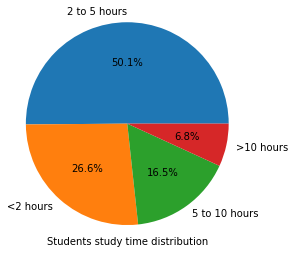

In [14]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(d_math['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')
plt.xlabel('Students study time distribution')

We have a pie chart that represents students grade distribution according to weekly alcohol consumption. It shows that at 60% of students consume alcohol during the week which is surprisingly high(compared to our generation).

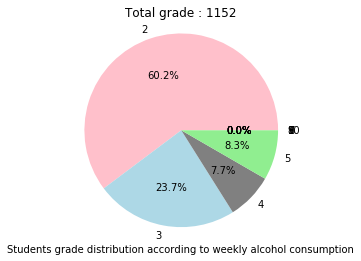

In [12]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['pink','lightblue','grey','lightgreen','brown','blue','orange','black','purple']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(d_math[d_math.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(d_math))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

We combine the daily and weekend alcohol consumption in order to show an overview of the consumption of alcohol for the entire
week

In [4]:
d_math['Galc'] = d_math['Dalc'] + d_math['Walc']

Now, looking into both classes separately, we look at how study time affects average grade. With experience, we must say that it does affect it quite a lot. This time we also used error bars to represent how far from the reported value, the true value is.
From the above graph, we can see that a moderate study time of 5-10 hours per week gives good grades relatively. 

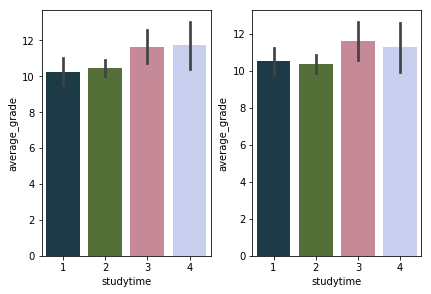

In [25]:
fig, axs = plt.subplots(ncols=2)
plt.tight_layout()
sns.barplot(x = "studytime", y = "average_grade", data = d_math, ax=axs[0],palette="cubehelix")
sns.barplot(x = "studytime", y = "average_grade", data = d_por, ax=axs[1],palette="cubehelix")

We look into another factor, 'sex'. Does it matter? Yes it does! The graph below shows how the average grade is different for Males and Females.In both the graphs we can see that male has a higher average grade. This can be due to two factors one, the count of males in a class is higher than females. Second based on our research there are few factors like concentration, dedication, focusing on one thing at a time, confidence etc.that are more dominant in males than females.

This is a plot for the math class:

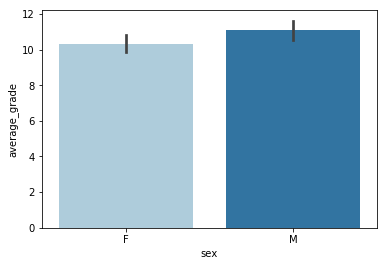

In [26]:
sns.barplot(x = "sex", y = "average_grade",data = d_math,palette="Paired")

The graph below is for the Portugese class. Males perform better here as well due to some factors I mentioned above. 

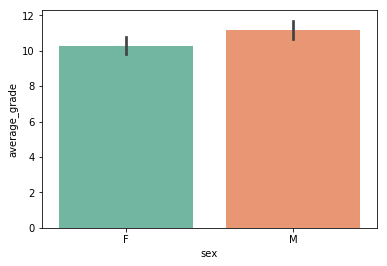

In [28]:
sns.barplot(x = "sex", y = "average_grade",data = d_por,palette="Set2")

Next, we consider the factor 'Health'. We all know how bad health affects the grades as performance and conentration reduces. It is a temporary affect but sometimes can be fatal.  From the graph below, it is clear that as the health deteriorates, the grades get worse.

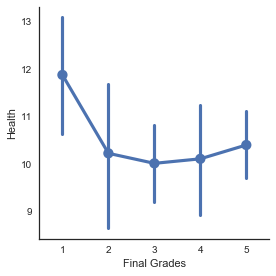

In [23]:
plot1 = sns.factorplot(x="health", y="G3",data=d_math)
plot1.set(ylabel="Health", xlabel="Final Grades")

Based on the correlation plot, we can see that grades G1, G2 and G3 are highly correlated to each other. Therefore we are using G3 to represent all grades in some of the visualizations. There might be several other factors individually or combined which can influence the grades. However we are looking at the ones which have a high correlation values because these seem to be the ones directly affecting grades in the dataset.

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5]),
 <a list of 17 Text yticklabel objects>)

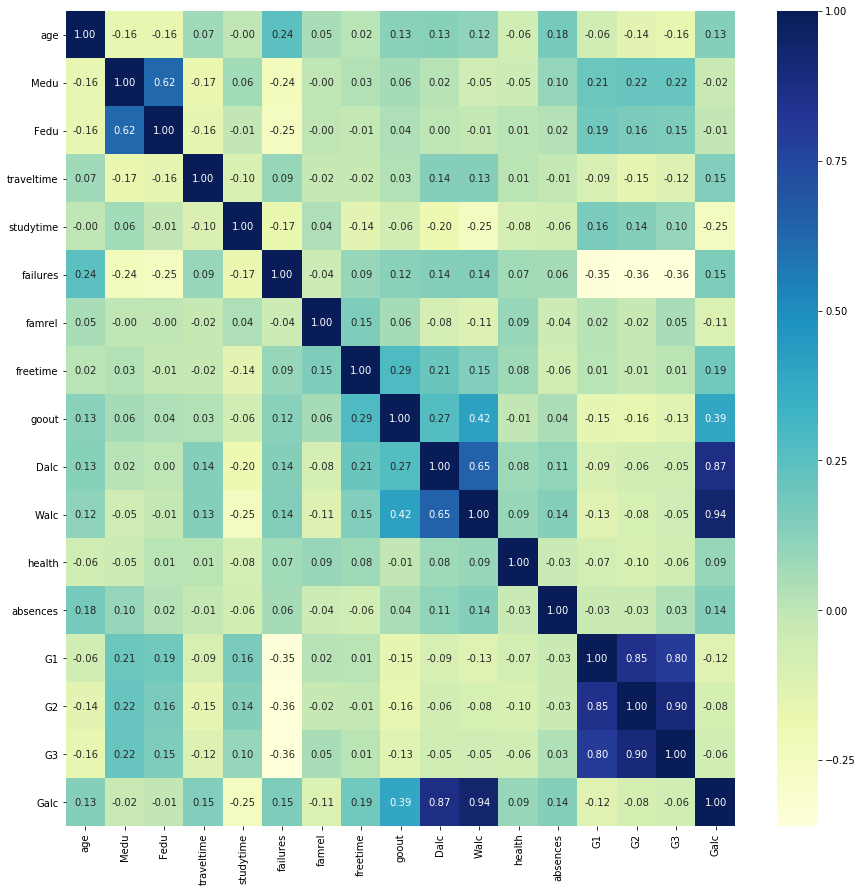

In [10]:
# Correlation
plt.figure(figsize=(15,15))
sns.heatmap(d_math.corr(),annot = True, fmt = ".2f",cbar = True, cmap = 'YlGnBu')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

We have plotted the same correlation plot in a different way without printing the values. This also clearly shows us what factors seems to affect the grade the most. We will consider the top 5 factors. 

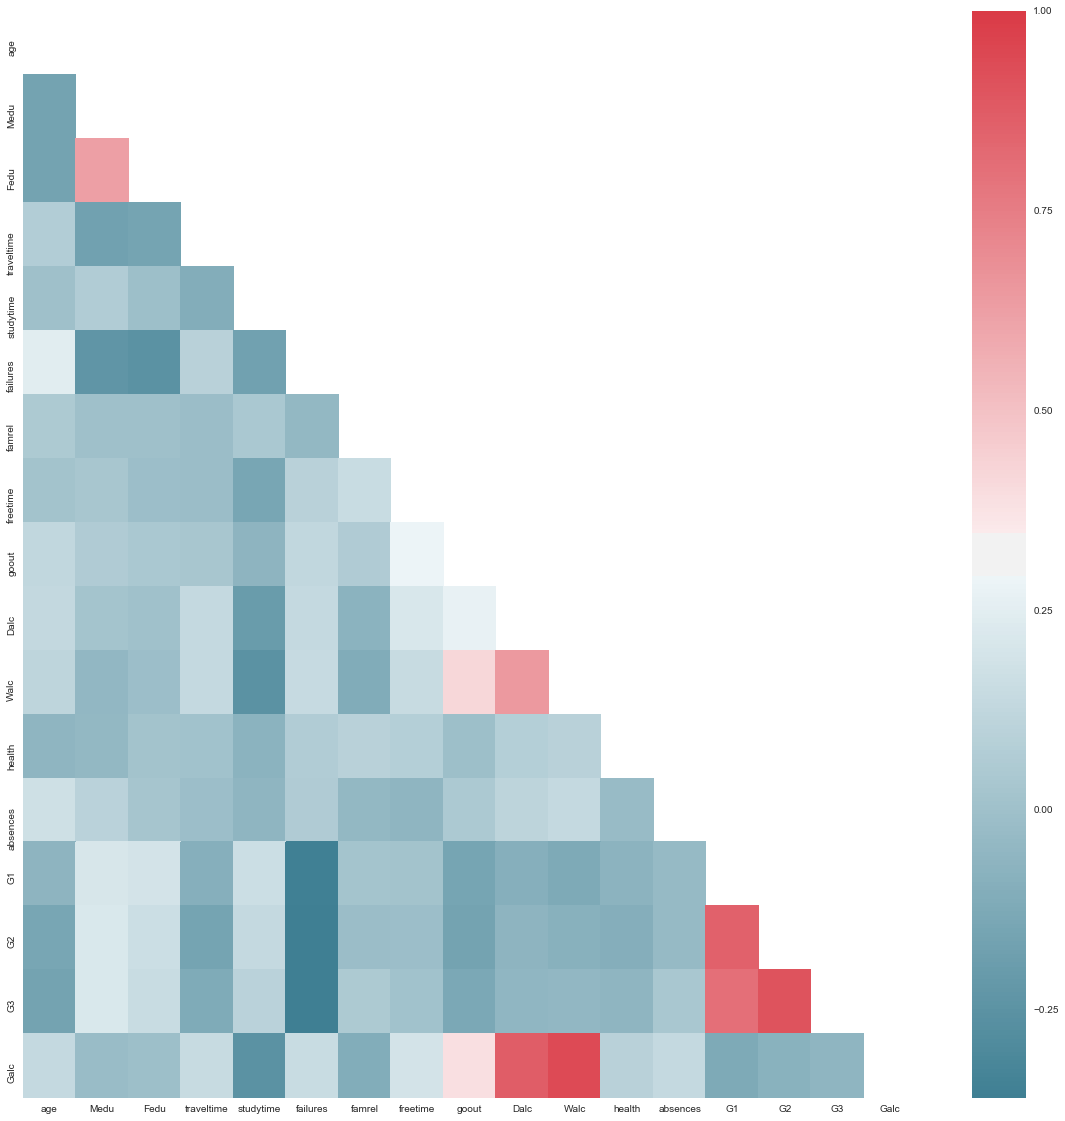

In [16]:
df = d_math
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(20, 20))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = df.corr()
#variable_correlations
heat_map(variable_correlations)

We can see that Daily Alcohol consumption and weekend Alcohol consumption are highly correlated to grades. This is followed by  Mothers and fathers education. Also, Going out and freetime have a relatively high correlation with the grades. We will further try to understand which of these factors seem to affect the most and their polarity(Affect grades positively or negatively)

From the data set it is clear that there are no students that do not consume alcohol.The x axis represents the number of times students consume alcohol per week. The minimum amount of alcohol consumed is twice a week. We can also see that max amt of students consume alcohol twice a week.. So around 150 students consume alcohol atleast 2 times a week. Around 65 students consume alcohol atleast 3 times a week and so on.In the plot the number of students consuming alcohol is decreasing with the number of times they have it in a week

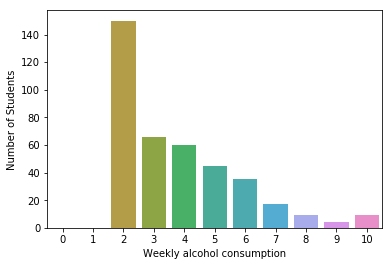

In [20]:
list = []
for i in range(11):
    list.append(len(d_math[d_math.Galc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

Now we can see how Alcohol consumption affects the Final grade. The plot also shows a range for which each of the values can vary. We can see that the influence of alcohol on males and females are different. In case of females, a small amount of alcohol consumption per week is helping them with their grades. However an increase in consumption is causing a descent in their grades. For males, a high level of consumption leads to good grades but excess drinking drops their grades. Based on this we can say that, a decent amount of liquor consumption gives certain amount of relaxation in a stressful week, however if the quantity increases, it affects them negatively

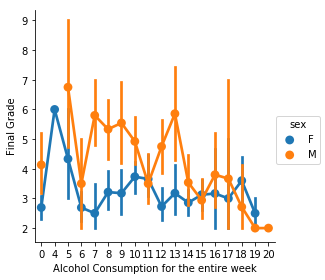

In [22]:
plot1 = sns.factorplot(x="G3", y="Galc", hue="sex", data=d_math)
plot1.set(ylabel="Final Grade", xlabel="Alcohol Consumption for the entire week")

In [29]:
def alchololic(dataframe):
    if(dataframe['Walc'] >= 3):
        return(True)
    else:
        return(False)

d_math['alchololic'] = d_math.apply(lambda row: alchololic(row), axis = 1)

d_por['alchololic'] = d_por.apply(lambda row: alchololic(row), axis = 1)

Next we have a graph that represents the average grade when student are consuming and not consuming alcohol. We have two graphs, one for math class and the other for portuguese. The graphs show that when females consume some amount of alcohol, their grade increases. However, for men, it's the opposite. This might be because it helps the females to relax and hence perform better. There might be several other reasons as to how the brain reacts to alcohol consumption for females and so on. Math class involves more logic than memorization. Alcohol might trigger female brains to be more active.

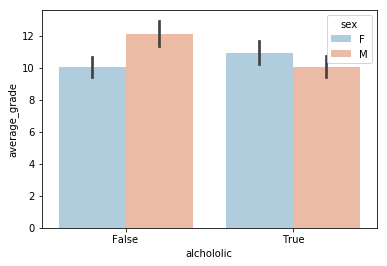

In [31]:
#Let's see the relationship between the alcoholism and average grade. 
sns.barplot(x = "alchololic", y = "average_grade", hue = "sex", data = d_math, palette="RdBu_r")

There seems to be a similar pattern for the portugese class. If females take alcohol then their grades seem to improve while it's reverse with males. Again it might be the alcohol trigerring something in the female brain that improves memory.

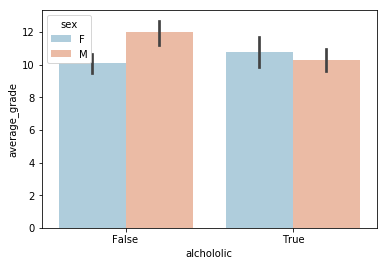

In [32]:
sns.barplot(x = "alchololic", y = "average_grade", hue = "sex", data = d_por,palette="RdBu_r")

The subplots below represent the failures due to alcohol consumption for both math and portuguese classes. The failures are especially high for males as consumption of alcohol seems to affect them more that females. From the above graph, considering classes that involve logic and memory, alcohol seem to affect males more than females. They have a higher negative impact for males when compared to females

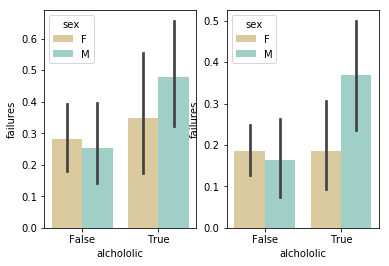

In [33]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(x = "alchololic", y = "failures", data = d_math, hue="sex", ax = axs[0],palette="BrBG")
sns.barplot(x = "alchololic", y = "failures", data = d_por, hue = "sex", ax = axs[1],palette="BrBG")

In [25]:
rural_data = d_math[d_math['address'] == 'R']
urban_data = d_math[d_math['address'] == 'U']

The consumption of alcohol is high in Urban areas whether it is a weekday or the weekend. Research also shows how student’s grades are lesser in Urban areas when compared to rural areas. In urban areas, there are many distractions like the internet, malls, restaurants and fancy places to visit. However, a simple life(financially and socially) in the rurals helps students stay more focused and consume less liquor.

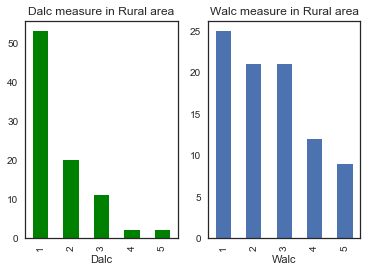

In [31]:
fig, ax = plt.subplots(1, 2)
rural_data.groupby(['Dalc']).size().plot(kind='bar', ax=ax[0], title='Dalc measure in Rural area',color='green')
rural_data.groupby(['Walc']).size().plot(kind='bar', ax=ax[1], title='Walc measure in Rural area')

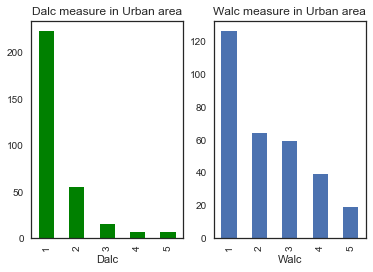

In [27]:
fig, ax = plt.subplots(1, 2)
urban_data.groupby(['Dalc']).size().plot(kind='bar', ax=ax[0], title='Dalc measure in Urban area',color='green')
urban_data.groupby(['Walc']).size().plot(kind='bar', ax=ax[1], title='Walc measure in Urban area')

In [23]:
def max_parenteducation(dataframe):
    return(max(dataframe['Medu'], dataframe['Fedu']))

d_math['maxparent_education'] = d_math.apply(lambda row: max_parenteducation(row), axis = 1)

def grade_average(dataframe):
    return((dataframe['G1']+dataframe['G2']+dataframe['G3'])/3 )
    
d_math['average_grade'] = d_math.apply(lambda row: grade_average(row), axis = 1)
d_por['average_grade'] = d_math.apply(lambda row: grade_average(row), axis = 1)

Now looking at a few other factors, Does parent education affect the grade? Of course it does!(Well atleast thats what the graph says). There seems to be a clear correlation between how well the parents studied to how well a child will perform! This seems to be true because an educated parent will always support their child’s education and goals. The child might also get influenced by the smartness of the parent and pick up on it or aim higher. When a child is surrounded by people who are educated, they are influenced into being educated as well

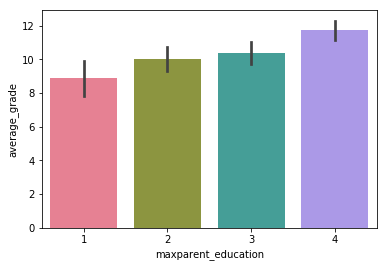

In [24]:
sns.barplot(x = "maxparent_education", y = "average_grade", data = d_math, palette="husl")

We can see that parents education level is directly proportional to the child’s academic performance. The higher the mothers education is the higher the kids grades are. On the other hand, if the father has a moderate school level education the kids grades stays high. Based on the graph we can see that a Mother’s education is more linearly proportional to the child's grade as compared to a father's education. Thereby, concluding a mother has more impact in the academic life of the child.

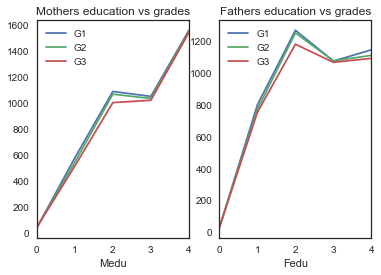

In [18]:
fig, ax = plt.subplots(1, 2)

job_df = d_math[['Medu','G1','G2','G3']]
job_df.groupby(['Medu']).sum().plot(ax=ax[0], legend=True, title="Mothers education vs grades")

job_df = d_math[['Fedu','G1','G2','G3']]
job_df.groupby(['Fedu']).sum().plot(ax=ax[1], legend=True, title="Fathers education vs grades")

Numeric Representation of Parents Education

0 - none/
1 - till 4th grade/
2 – 5th to 9th grade/
3 – secondary education/ 
4 – higher education


Here the numbers from 1 to 4 on the x axis represnt the following:

1- less than 2 hours of studying/
2- 2 to 5 hours of studying/ 
3- 5 to 10 hours of studying/
4- greater than 10 hours 

In the plots below we can see that parents jobs also affect the student's grades. The children get lower grades when the Parent are at home.The father being at Home is a more influencing in lower grades than the mother being at home. If the parents have some kind of job the kid has decent grades. Probably indicating that when there is a working member in the family there is less tension hence the child performs better at school.Thus, we can assume from this that Parents education and work status have a huge impact on the child's academic performance

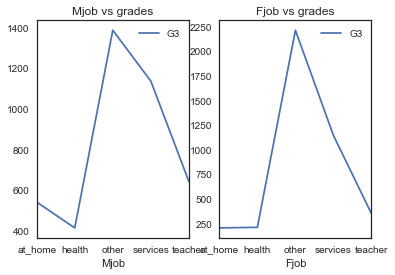

In [17]:
fig, ax = plt.subplots(1, 2)

job_df = d_math[['Mjob','G3']]
job_df.groupby(['Mjob']).sum().plot(ax=ax[0], legend=True, title="Mjob vs grades")

job_df = d_math[['Fjob','G3']]
job_df.groupby(['Fjob']).sum().plot(ax=ax[1], legend=True, title="Fjob vs grades")

The plot below represents how student's grades are affected by Parent's cohabitation status and their jobs. 
The status 'T' refers to parents being and living together.
Status 'A' refers to parents living apart.

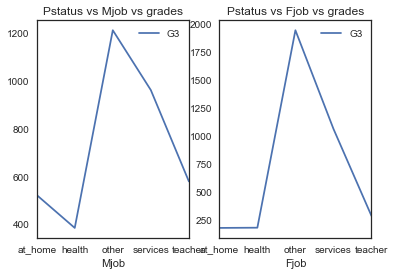

In [33]:
fig, ax = plt.subplots(1, 2)
status_job = d_math[['Pstatus', 'Mjob','G3']]
status_job_df = status_job[status_job['Pstatus'] == 'T']
status_job_df.groupby(['Mjob']).sum().plot(ax=ax[0], legend=True, title="Pstatus vs Mjob vs grades")

status_job = d_math[['Pstatus', 'Fjob','G3']]
status_job_df = status_job[status_job['Pstatus'] == 'T']
status_job_df.groupby(['Fjob']).sum().plot(ax=ax[1], legend=True, title="Pstatus vs Fjob vs grades")

The scale on X axis represents the amount a student hangs out with his or her friends in a week with 1 being the lowest and 5 being the highest. From the KDE plot we can observe that a moderate amount of going out is leading to good grades. However, on increase of going out we can notice that there is a slight drop in the grade. If a student is allocating too much time hanging out with his friends it would affect his grades negatively.Thus, going out can positively or negatively affect grades based on the peer group

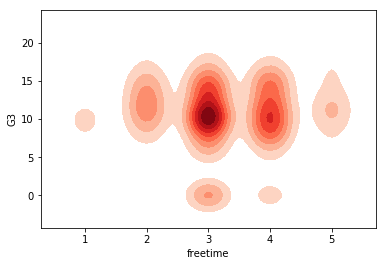

In [6]:
sns.kdeplot(d_math.freetime, d_math.G3, shade = True, shade_lowest = False,cmap = 'Reds')

The scale on X axis represents the amount a student has free time after school in a week with 1 being the lowest and 5 being the highest. Based on the KDE plot we can see that an average amount of free time results in an average or higher grade. We can conclude by saying that the grades are directly proportional to the amount of free time. free time can account for sports or other hobbies that the student wants to pursue. Thus, improving their concentration in academics.

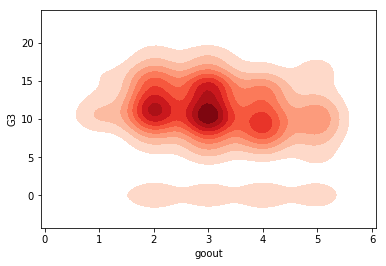

In [8]:
sns.kdeplot(d_math.goout, d_math.G3, shade = True, shade_lowest = False,cmap = 'Reds')

We would thus like to conclude that alcohol is most likely the highest contributor to the student’s grade. This is based on the visualizations we have seen especially the correlation plot. Whether the effect is negative or positive is what we try to understand in depth in our future work. 